# 01_Adv_FGSM

In [1]:
import numpy as np
import random
import torch
torch.cuda.set_device(3)

In [2]:
random_seed = 617
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed) # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)
print("Random Seed:",random_seed)

Random Seed: 617


In [3]:
# Import utils from a specific defense
from defenses.base.loader import get_loader
from defenses.base.model import get_model
from defenses.adv_fgsm.train import Trainer, get_acc

Loader : Base
Model : Base
Train : Adv FSGM


In [4]:
# Set Name
NAME = "01_Adv_FGSM"

## 1. Train

In [5]:
# Get Train, Test datasets
train_loader_ns, _ = get_loader(shuffle_train=False)
train_loader, test_loader = get_loader(shuffle_train=True)

# Get Model
model = get_model().cuda()

Files already downloaded and verified
Files already downloaded and verified
Data Loaded!
Train Data Length : 50000
Test Data Length : 10000
Files already downloaded and verified
Files already downloaded and verified
Data Loaded!
Train Data Length : 50000
Test Data Length : 10000
WRN-28 is loaded.


In [6]:
train_sets = iter(train_loader_ns).next()
test_sets = iter(test_loader).next()

In [7]:
# Train Model
trainer = Trainer(model, train_sets, test_sets, eps=8/255)
trainer.train(train_loader, epochs=200,
              save_path="./_models/"+NAME,
              record_type="Epoch", save_type="Epoch")

Train Information:
-Epochs: 200
-Optimizer: SGD (
Parameter Group 0
    dampening: 0
    initial_lr: 0.1
    lr: 0.1
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0005
)
-Scheduler: <torch.optim.lr_scheduler.MultiStepLR object at 0x7f4e31a28cf8>
-Save Path: ./_models/01_Adv_FGSM
-Save Type: Per Epoch
-Record Type: Per Epoch
-Device: cuda
--------------------------------------------------------------------------------------------------------------------------
Epoch   Loss     Acc       Clean(Tr)   FGSM(Tr)   PGD(Tr)   GN(Tr)    Clean(Te)   FGSM(Te)   PGD(Te)   GN(Te)    lr       
1       2.1084   20.8213   32.0312     18.7500    18.7500   31.2500   44.5312     32.8125    32.0312   42.9688   0.1000   
--------------------------------------------------------------------------------------------------------------------------
2       1.9484   26.3101   40.6250     23.4375    23.4375   39.8438   52.3438     33.5938    34.3750   46.8750   0.1000   
---------------------------------

32      1.4046   47.3117   79.6875     52.3438    50.7812   71.0938   71.8750     46.8750    40.6250   71.0938   0.1000   
--------------------------------------------------------------------------------------------------------------------------
33      1.3934   47.9287   73.4375     49.2188    42.1875   72.6562   75.7812     43.7500    38.2812   71.0938   0.1000   
--------------------------------------------------------------------------------------------------------------------------
34      1.3782   48.2111   76.5625     52.3438    46.0938   68.7500   73.4375     44.5312    38.2812   68.7500   0.1000   
--------------------------------------------------------------------------------------------------------------------------
35      1.3695   48.9203   74.2188     54.6875    53.1250   75.0000   75.7812     48.4375    43.7500   73.4375   0.1000   
--------------------------------------------------------------------------------------------------------------------------
36      1.2150  

66      1.2644   52.3277   82.8125     57.8125    55.4688   75.0000   79.6875     51.5625    46.0938   81.2500   0.0200   
--------------------------------------------------------------------------------------------------------------------------
67      1.2455   52.9407   84.3750     57.0312    56.2500   73.4375   78.9062     55.4688    50.7812   78.1250   0.0200   
--------------------------------------------------------------------------------------------------------------------------
68      1.2289   53.3814   80.4688     60.9375    52.3438   73.4375   75.0000     46.8750    42.9688   75.7812   0.0200   
--------------------------------------------------------------------------------------------------------------------------
69      1.2114   54.2668   82.8125     63.2812    59.3750   77.3438   83.5938     53.1250    42.9688   79.6875   0.0200   
--------------------------------------------------------------------------------------------------------------------------
70      1.1965  

100     1.0894   58.4175   86.7188     64.8438    55.4688   82.8125   82.0312     50.0000    45.3125   79.6875   0.0200   
--------------------------------------------------------------------------------------------------------------------------
101     1.0706   59.3369   90.6250     66.4062    60.9375   83.5938   77.3438     48.4375    42.1875   75.7812   0.0200   
--------------------------------------------------------------------------------------------------------------------------
102     1.0619   59.4932   90.6250     66.4062    57.8125   83.5938   83.5938     48.4375    44.5312   76.5625   0.0200   
--------------------------------------------------------------------------------------------------------------------------
103     1.0457   59.9339   91.4062     66.4062    59.3750   85.9375   76.5625     55.4688    50.0000   78.9062   0.0200   
--------------------------------------------------------------------------------------------------------------------------
104     1.0338  

134     0.0086   99.8257   87.5000     100.0000   0.7812    77.3438   85.9375     99.2188    0.7812    67.1875   0.0040   
--------------------------------------------------------------------------------------------------------------------------
135     0.0083   99.8277   88.2812     100.0000   0.7812    71.0938   86.7188     99.2188    1.5625    66.4062   0.0040   
--------------------------------------------------------------------------------------------------------------------------
136     0.0087   99.8137   86.7188     100.0000   0.0000    76.5625   84.3750     99.2188    0.0000    56.2500   0.0040   
--------------------------------------------------------------------------------------------------------------------------
137     0.0092   99.7937   86.7188     100.0000   0.0000    79.6875   83.5938     99.2188    0.7812    64.8438   0.0040   
--------------------------------------------------------------------------------------------------------------------------
138     0.0129  

168     0.0044   99.9339   91.4062     100.0000   0.7812    77.3438   89.8438     100.0000   2.3438    65.6250   0.0008   
--------------------------------------------------------------------------------------------------------------------------
169     0.0039   99.9479   91.4062     100.0000   1.5625    78.9062   89.8438     100.0000   1.5625    60.9375   0.0008   
--------------------------------------------------------------------------------------------------------------------------
170     0.0041   99.9299   91.4062     100.0000   0.7812    80.4688   89.0625     100.0000   1.5625    64.8438   0.0008   
--------------------------------------------------------------------------------------------------------------------------
171     0.0038   99.9539   89.0625     100.0000   0.7812    78.9062   88.2812     100.0000   1.5625    67.9688   0.0008   
--------------------------------------------------------------------------------------------------------------------------
172     0.0044  

In [8]:
trainer.save_all("./_models/"+NAME)

...Saved as csv to ./_models/01_Adv_FGSM.csv !


In [9]:
print("Final Test Acc : %2.2f"%get_acc(model, test_loader))

Final Test Acc : 84.10


## 2. Record Visualization

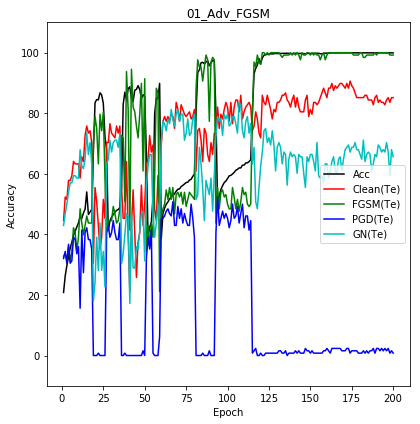

In [11]:
# Plot Train and Test Accuracy
trainer.rm.plot(title=NAME, xlabel="Epoch", ylabel="Accuracy", ylabel_second="Loss",
                x_key='Epoch', y_keys=['Acc', 'Clean(Te)', 'FGSM(Te)', 'PGD(Te)', 'GN(Te)'],
                ylim=(-10, 110), colors=['k', 'r', 'g', 'b', 'c'])

## 3. White Box Attack

In [12]:
import torchattacks
from torchattacks import FGSM, PGD, MultiAttack

In [13]:
model.load_state_dict(torch.load("./_models/"+NAME+".pth"))
model = model.cuda().eval()

### 3.1 FGSM

In [14]:
fgsm = FGSM(model, eps=8/255)
fgsm.set_mode('int')
fgsm.save(data_loader=test_loader,
          file_name="./_datasets/"+NAME+"_FGSM.pt", accuracy=True)

- Save Progress : 100.00 % / Accuracy : 99.23 %
- Save Complete!


### 3.2 PGD

In [15]:
# WB2 : PGD
pgd = PGD(model, alpha=2/255, eps=8/255, iters=50)
pgd.set_mode('int')
pgd.save(data_loader=test_loader,
         file_name="./_datasets/"+NAME+"_PGD.pt", accuracy=True)

- Save Progress : 100.00 % / Accuracy : 0.09 %
- Save Complete!


### 3.3 PGD with 10 Random Restarts

In [16]:
# WB3 : PGD
pgd = PGD(model, alpha=2/255, eps=8/255, iters=50, random_start=True)
multi = MultiAttack(model, [pgd]*10)
multi.set_mode('int')
multi.save(data_loader=test_loader,
           file_name="./_datasets/"+NAME+"_RPGD.pt", accuracy=True)

/usr/local/lib/python3.6/dist-packages/torchattacks/attacks/multiattack.py:58: Warning:


 * Ealry Stopped cause all images are successfully perturbed.



- Save Progress : 100.00 % / Accuracy : 0.03 %
- Save Complete!


## 4. Black Box Attack

In [17]:
from torch.utils.data import TensorDataset, DataLoader

In [18]:
# BB1 : WRN_28_20
adv_images, adv_labels = torch.load("./_datasets/00_WRN_28_20_PGD.pt")
adv_data = TensorDataset(adv_images.float()/255, adv_labels)
adv_loader = DataLoader(adv_data, batch_size=128, shuffle=False)
get_acc(model, adv_loader)

84.27

In [19]:
# BB2 : WRN_40_10
adv_images, adv_labels = torch.load("./_datasets/00_WRN_40_10_PGD.pt")
adv_data = torch.utils.data.TensorDataset(adv_images.float()/255, adv_labels)
adv_loader = DataLoader(adv_data, batch_size=128, shuffle=False)
get_acc(model, adv_loader)

84.74